Code to demonstrate basic tetrad_plus capabilities.

In [1]:
from tetrad_plus import TetradPlus
from dgraph_flex import DgraphFlex
import semopy
import pprint as pp

# create  an instance of TetradPlus
tp = TetradPlus()

Attempting to start JVM with classpath: /Users/kolim/Projects/tetrad_plus/tetrad_plus/jars/tetrad-gui-7.6.3-launch.jar


In [2]:
# set the data and knowledge files
data_file = 'data/boston_data_raw.csv'
knowledge_file = 'data/boston_prior.txt'


In [3]:
# read in the data
df = tp.read_csv(data_file)
df

,alcohol_bev,TIB,TST,PANAS_PA,PANAS_NA,worry_scale,PHQ9
0,1.0,9.00,7.333333,44.0,13.0,8.0,0.0
1,0.0,10.25,8.750000,40.0,12.0,14.0,0.0
2,1.0,8.50,7.166667,39.0,12.0,15.0,0.0
3,1.0,8.75,8.083333,39.0,12.0,12.0,0.0
4,1.0,8.25,6.666667,38.0,13.0,15.0,0.0
...,...,...,...,...,...,...,...
636,4.0,8.75,7.916667,29.0,12.0,17.0,3.0
637,4.0,8.50,7.666667,31.0,12.0,17.0,4.0
638,3.0,8.50,7.583333,33.0,13.0,17.0,3.0
639,3.0,9.00,8.166667,31.0,12.0,19.0,2.0


In [4]:
# add the lags, with a suffix of '_lag'
df_lag = tp.add_lag_columns(df, lag_stub='_lag')
df_lag

,alcohol_bev,TIB,TST,PANAS_PA,PANAS_NA,worry_scale,PHQ9,alcohol_bev_lag,TIB_lag,TST_lag,PANAS_PA_lag,PANAS_NA_lag,worry_scale_lag,PHQ9_lag
0,0.0,10.25,8.750000,40.0,12.0,14.0,0.0,1.0,9.00,7.333333,44.0,13.0,8.0,0.0
1,1.0,8.50,7.166667,39.0,12.0,15.0,0.0,0.0,10.25,8.750000,40.0,12.0,14.0,0.0
2,1.0,8.75,8.083333,39.0,12.0,12.0,0.0,1.0,8.50,7.166667,39.0,12.0,15.0,0.0
3,1.0,8.25,6.666667,38.0,13.0,15.0,0.0,1.0,8.75,8.083333,39.0,12.0,12.0,0.0
4,0.0,8.25,7.416667,37.0,12.0,16.0,0.0,1.0,8.25,6.666667,38.0,13.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,4.0,8.75,7.916667,29.0,12.0,17.0,3.0,6.0,7.00,6.166667,31.0,15.0,18.0,3.0
636,4.0,8.50,7.666667,31.0,12.0,17.0,4.0,4.0,8.75,7.916667,29.0,12.0,17.0,3.0
637,3.0,8.50,7.583333,33.0,13.0,17.0,3.0,4.0,8.50,7.666667,31.0,12.0,17.0,4.0
638,3.0,9.00,8.166667,31.0,12.0,19.0,2.0,3.0,8.50,7.583333,33.0,13.0,17.0,3.0


In [5]:
# standardize the data
df_lag_std = tp.standardize_df_cols(df_lag)
df_lag_std

,alcohol_bev,TIB,TST,PANAS_PA,PANAS_NA,worry_scale,PHQ9,alcohol_bev_lag,TIB_lag,TST_lag,PANAS_PA_lag,PANAS_NA_lag,worry_scale_lag,PHQ9_lag
0,-0.720086,0.945596,0.714807,1.403653,-0.442144,-1.025409,-0.961531,-0.045027,0.019757,-0.338939,1.808615,-0.237832,-1.969207,-0.960600
1,-0.048041,-0.349371,-0.463029,1.300809,-0.442144,-0.866815,-0.961531,-0.719118,0.944940,0.714883,1.398222,-0.442144,-1.020311,-0.960600
2,-0.048041,-0.164376,0.218876,1.300809,-0.442144,-1.342597,-0.961531,-0.045027,-0.350317,-0.462918,1.295624,-0.442144,-0.862161,-0.960600
3,-0.048041,-0.534367,-0.834977,1.197966,-0.237832,-0.866815,-0.961531,-0.045027,-0.165280,0.218966,1.295624,-0.442144,-1.336610,-0.960600
4,-0.720086,-0.534367,-0.277055,1.095122,-0.442144,-0.708221,-0.961531,-0.045027,-0.535353,-0.834856,1.193025,-0.237832,-0.862161,-0.960600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.968095,-0.164376,0.094893,0.272375,-0.442144,-0.549627,0.053947,3.325425,-1.460537,-1.206793,0.474838,0.170792,-0.387713,0.054453
636,1.968095,-0.349371,-0.091081,0.478062,-0.442144,-0.549627,0.392440,1.977244,-0.165280,0.094987,0.269641,-0.442144,-0.545863,0.054453
637,1.296050,-0.349371,-0.153072,0.683748,-0.237832,-0.549627,0.053947,1.977244,-0.350317,-0.090981,0.474838,-0.442144,-0.545863,0.392805
638,1.296050,0.020619,0.280867,0.478062,-0.442144,-0.232439,-0.284546,1.303154,-0.350317,-0.152971,0.680034,-0.237832,-0.545863,0.054453


In [6]:
# read the prior file for testing
prior_lines = tp.read_prior_file('data/boston_prior.txt')
# extract knowledge from the prior lines
knowledge = tp.extract_knowledge(prior_lines)
# load the knowledge into the TetradPlus instance
tp.load_knowledge(knowledge)
knowledge

{'addtemporal': {0: ['alcohol_bev_lag',
   'TIB_lag',
   'TST_lag',
   'PANAS_PA_lag',
   'PANAS_NA_lag',
   'worry_scale_lag',
   'PHQ9_lag'],
  1: ['alcohol_bev',
   'TIB',
   'TST',
   'PANAS_PA',
   'PANAS_NA',
   'worry_scale',
   'PHQ9']}}

In [7]:
search = tp.run_gfci(df_lag_std)
edges = tp.extract_edges(search)
edges

['PHQ9_lag <-> PANAS_NA_lag',
 'PANAS_NA_lag --> worry_scale_lag',
 'PHQ9 --> PANAS_NA',
 'PHQ9_lag --> PHQ9',
 'TIB_lag o-> TIB',
 'TIB_lag o-> TST_lag',
 'PANAS_PA_lag --> PANAS_PA',
 'PANAS_PA_lag --> PHQ9_lag',
 'PANAS_PA <-> PHQ9',
 'alcohol_bev_lag --> alcohol_bev',
 'PANAS_NA --> worry_scale',
 'worry_scale_lag --> alcohol_bev_lag',
 'TST_lag --> TST',
 'worry_scale --> PANAS_PA',
 'worry_scale_lag --> worry_scale',
 'worry_scale --> TST',
 'PANAS_NA <-> PANAS_NA_lag',
 'worry_scale_lag --> TST_lag',
 'PHQ9 <-> PANAS_NA_lag',
 'worry_scale_lag --> PANAS_PA_lag',
 'TIB <-> TST']

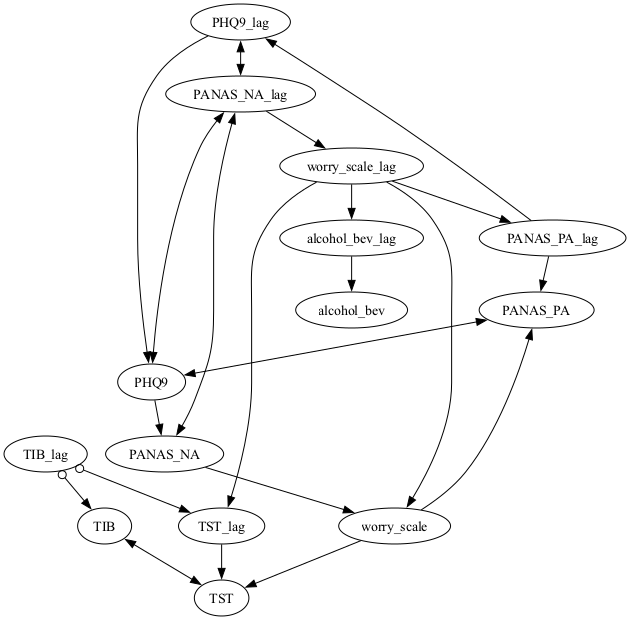

In [8]:
# show the raw graph
dg = DgraphFlex()
# add the edges to the graph object
dg.add_edges(edges)
# show the graph
dg.show_graph()

In [9]:
# run the sem

# convert the edges from searchResult to lavaan format
lavaan_model = tp.edges_to_lavaan(edges)
lavaan_model

'worry_scale_lag ~ PANAS_NA_lag\nPANAS_NA ~ PHQ9\nPHQ9 ~ PHQ9_lag\nTIB ~ TIB_lag\nTST_lag ~ TIB_lag\nPANAS_PA ~ PANAS_PA_lag\nPHQ9_lag ~ PANAS_PA_lag\nalcohol_bev ~ alcohol_bev_lag\nworry_scale ~ PANAS_NA\nalcohol_bev_lag ~ worry_scale_lag\nTST ~ TST_lag\nPANAS_PA ~ worry_scale\nworry_scale ~ worry_scale_lag\nTST ~ worry_scale\nTST_lag ~ worry_scale_lag\nPANAS_PA_lag ~ worry_scale_lag\n'

In [10]:
# run semopy with the lavaan model and the data
sem_results = tp.run_semopy(lavaan_model, df_lag_std)


In [11]:
# the main output we are interested in is the parameter estimates
sem_results['estimates']

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,worry_scale_lag,~,PANAS_NA_lag,-0.423208,0.035813,-11.817109,0.000000e+00
1,PANAS_NA,~,PHQ9,0.736357,0.026742,27.535935,0.000000e+00
2,PHQ9,~,PHQ9_lag,0.860650,0.020128,42.759092,0.000000e+00
3,TST_lag,~,TIB_lag,0.772701,0.024719,31.259979,0.000000e+00
4,TST_lag,~,worry_scale_lag,0.127495,0.024719,5.157771,2.499067e-07
5,PHQ9_lag,~,PANAS_PA_lag,-0.478572,0.034702,-13.790869,0.000000e+00
6,worry_scale,~,PANAS_NA,-0.105816,0.020292,-5.214695,1.841200e-07
7,worry_scale,~,worry_scale_lag,0.813037,0.020290,40.070535,0.000000e+00
8,alcohol_bev_lag,~,worry_scale_lag,0.151161,0.039077,3.868287,1.096026e-04
9,PANAS_PA_lag,~,worry_scale_lag,0.367673,0.036764,10.000929,0.000000e+00


In [12]:
# save the graph generated by semopy
# plot into png
png_path = 'boston_data.png'
g = semopy.semplot(sem_results['model'], png_path,  plot_covs = True)


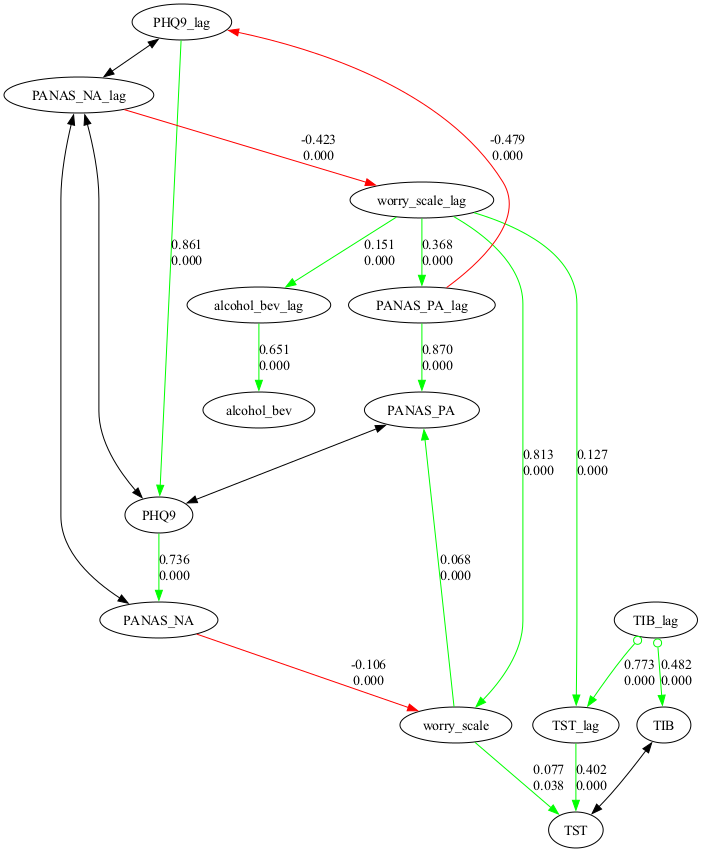

In [13]:
# add the sem results to our graph object

tp.add_sem_results_to_graph(dg, sem_results['estimates'])
# save the graph to a png file
dg.save_graph(plot_format='png', plot_name='boston_graph_single_sem')

# show the graph
dg.show_graph()